In [1]:
import torch 
import torchvision
import os 	
import torchvision.datasets as datasets 
from torch.utils.data import DataLoader 
import torch.nn as nn
import torch.nn.functional as F
import timm
import torch.optim as optim
from tqdm import tqdm
import torch
import torch.nn as nn
import torchvision.models as models

In [2]:

from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import glob

In [3]:
df  = pd.read_csv("/kaggle/input/swampy/train_csv/keys_and_classes.csv")
keys = df['Key'].tolist()
classes = df['Class'].tolist()
path = "/kaggle/input/swampy/train_img/"

In [39]:
new = glob.glob("/kaggle/input/testing/*")

In [48]:
class TestDataset(Dataset):
    def __init__(self, paths, batch_size=10):
        self.paths = paths
        
        

            
    def __len__(self):
        return len(self.paths)
        
    def __getitem__(self, index): 

        
        img = Image.open(self.paths[index])
        img = np.array(img)
        
       
        
        img = img.transpose((2, 0, 1))
        
        
        return img

In [4]:

class Dataset(Dataset):
    def __init__(self, path, keys, classes, batch_size=10):
        self.path = path
        self.keys = keys
        self.classes = classes
        self.batch_size = batch_size
        

            
    def __len__(self):
        return len(self.keys)
        
    def __getitem__(self, index): 

        
        img = Image.open(path + f"{keys[index]}.png")
        img = np.array(img)
        cl = classes[index]
       
        
        img = img.transpose((2, 0, 1))
        
        
        return img, cl



In [5]:
val_ds = Dataset(path, keys, classes)
val_loader = DataLoader(val_ds, batch_size=10, shuffle=True)
img, cl  = next(iter(val_loader))
img1 = img.to(torch.float32)

In [55]:
test_ds  = TestDataset(new)
test_loader = DataLoader(test_ds, batch_size=10)
im = next(iter(test_loader))
im1 = im.to(torch.float32)

In [8]:
model = models.resnet18(pretrained=True)
num_classes = 4  
model.fc = nn.Linear(model.fc.in_features, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")





/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 142MB/s] 


In [9]:


# Assuming 'train_loader' is your DataLoader
num_epochs = 10
for epoch in range(num_epochs):
    model.to(device)
    model.train()  # Set model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs = inputs.to(torch.float32)
        inputs = inputs.to(device) 
        labels = labels.to(device) 
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
    # Calculate epoch loss after each epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}')


Epoch [1/10], Training Loss: 0.9568
Epoch [2/10], Training Loss: 0.5206
Epoch [3/10], Training Loss: 0.4016
Epoch [4/10], Training Loss: 0.3572
Epoch [5/10], Training Loss: 0.2384
Epoch [6/10], Training Loss: 0.1896
Epoch [7/10], Training Loss: 0.1795
Epoch [8/10], Training Loss: 0.1093
Epoch [9/10], Training Loss: 0.0870
Epoch [10/10], Training Loss: 0.1059


In [10]:
torch.save(model.state_dict(), 'resnet18_model.pth')

In [59]:
model1 = models.resnet18(pretrained=False) 
num_classes = 4  
model1.fc = nn.Linear(model1.fc.in_features, num_classes)
model1.load_state_dict(torch.load("/kaggle/input/modelstingy/resnet18_model.pth"))

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

# Validation Data

In [60]:
model1.eval()
logits = model1(img1)
probabilities = torch.softmax(logits, dim=1)
predicted_labels = torch.argmax(probabilities, dim=1)
predicted_labels

tensor([1, 1, 2, 1, 1, 1, 1, 2, 3, 3])

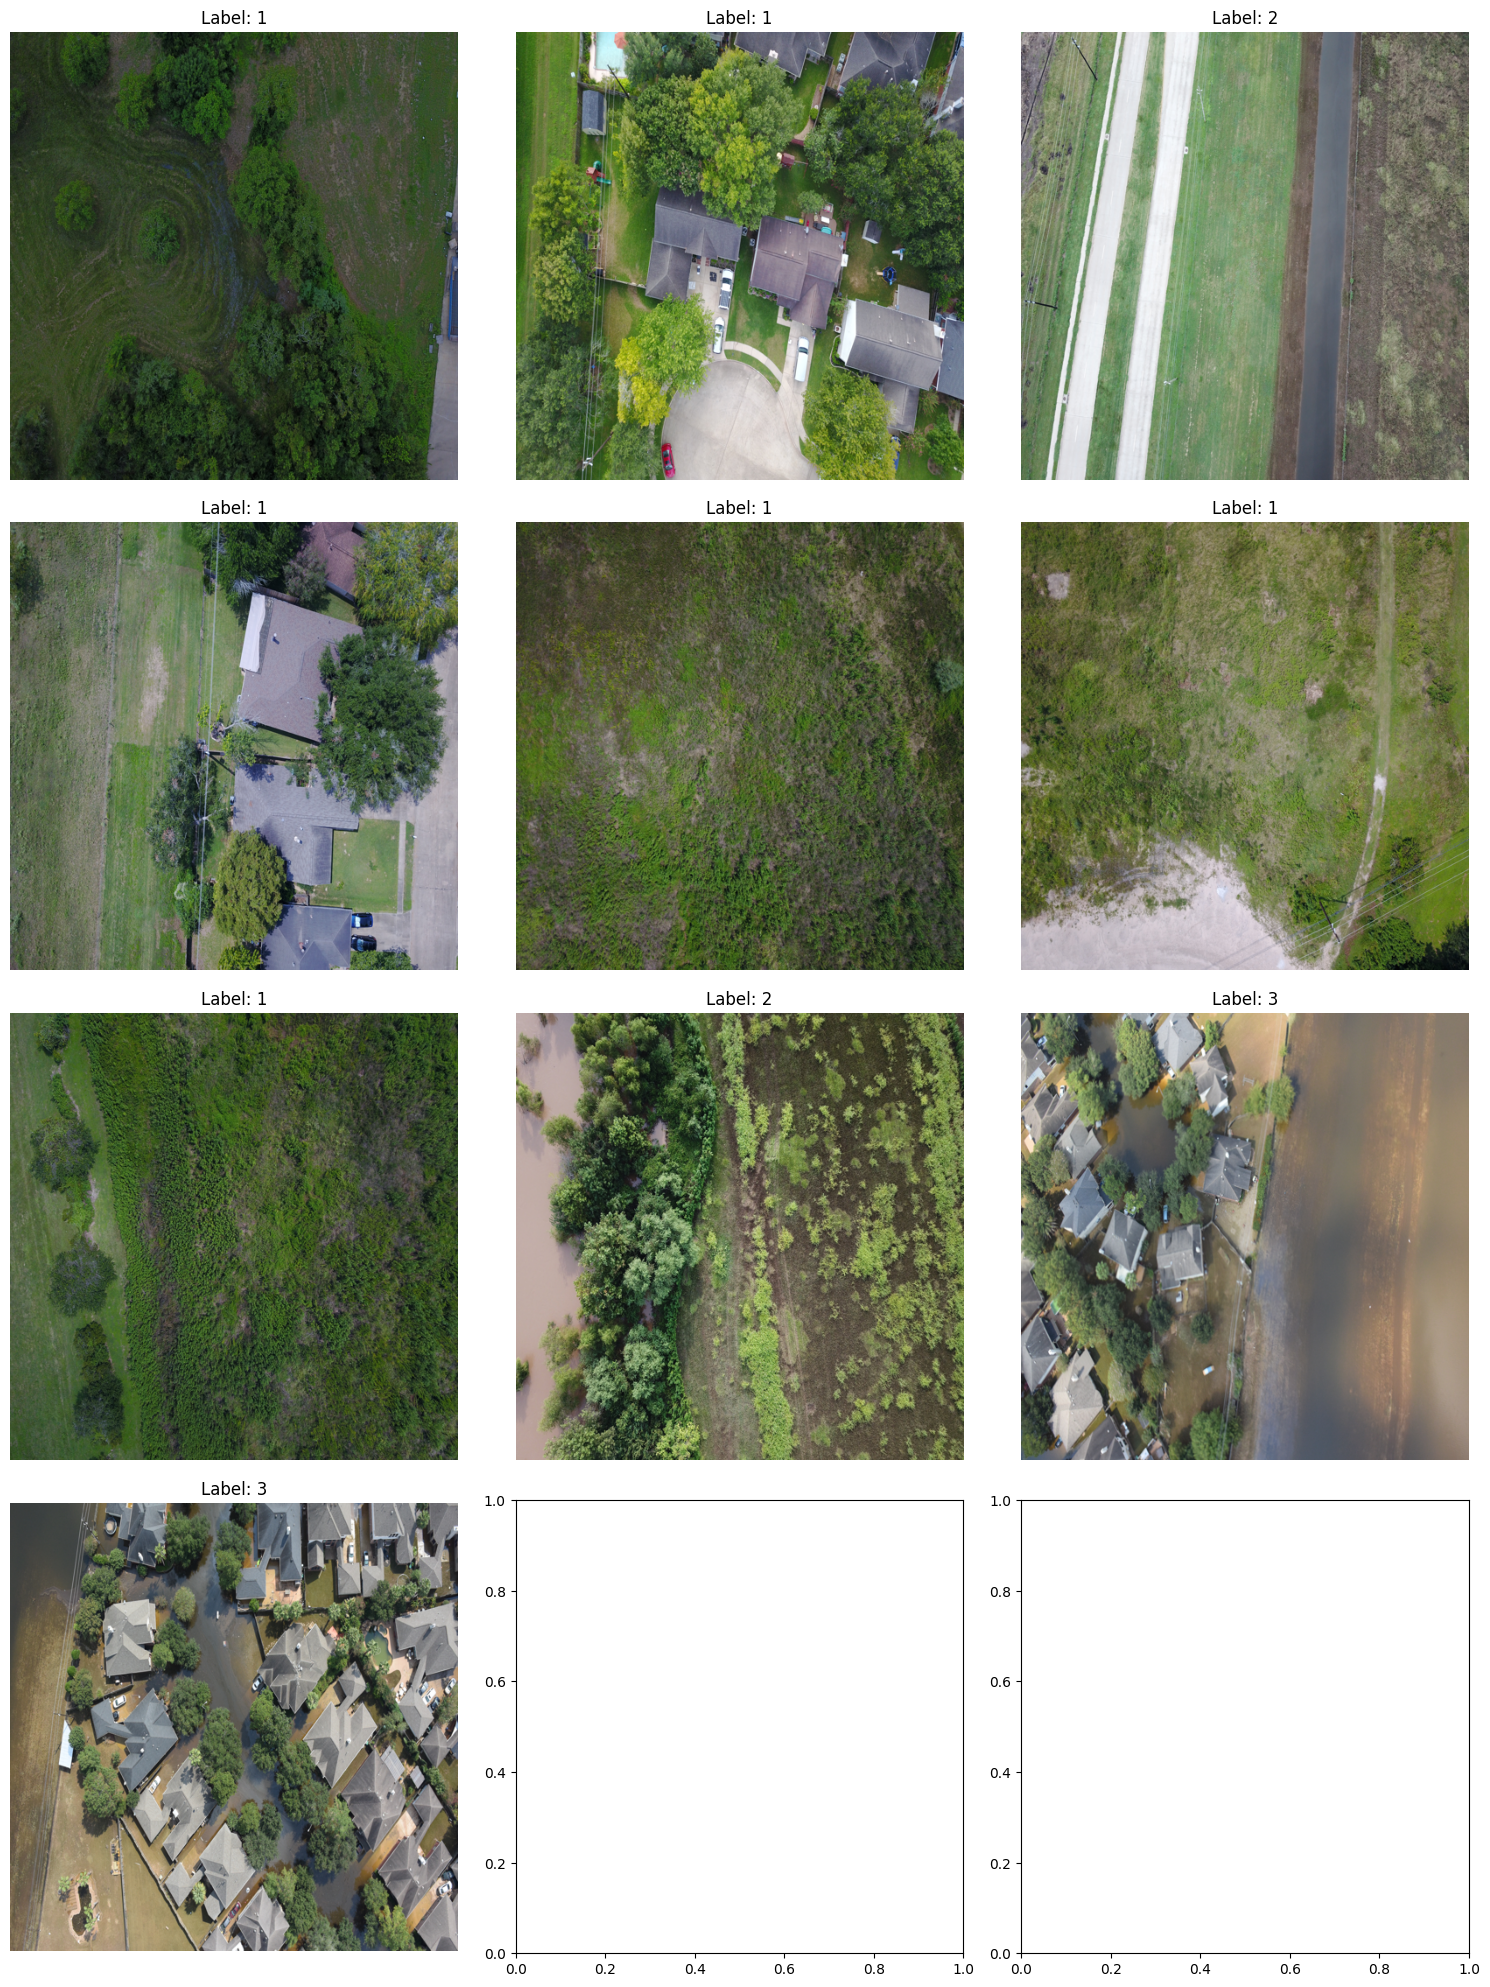

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'images' (list of 10 images) and 'predicted_labels' (list of 10 predicted labels) already defined

# Define a function to plot images and labels
def plot_images_with_labels(images, labels, ncols=3):
    nrows = int(np.ceil(len(images) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))

    for idx, (image, label) in enumerate(zip(images, labels)):
        ax = axes[idx // ncols, idx % ncols] if nrows > 1 else axes[idx % ncols]
        # If the images are normalized to [0, 1], remove this normalization step
        image = image.permute(1, 2, 0)  # Change channel ordering from (3, 512, 512) to (512, 512, 3)
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f'Label: {label}')

    plt.tight_layout()
    plt.show()

# Plot the images with labels
plot_images_with_labels(img, predicted_labels)


# Test Data

In [62]:
model1.eval()
logits = model1(im1)
probabilities = torch.softmax(logits, dim=1)
predicted_labels = torch.argmax(probabilities, dim=1)
predicted_labels

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

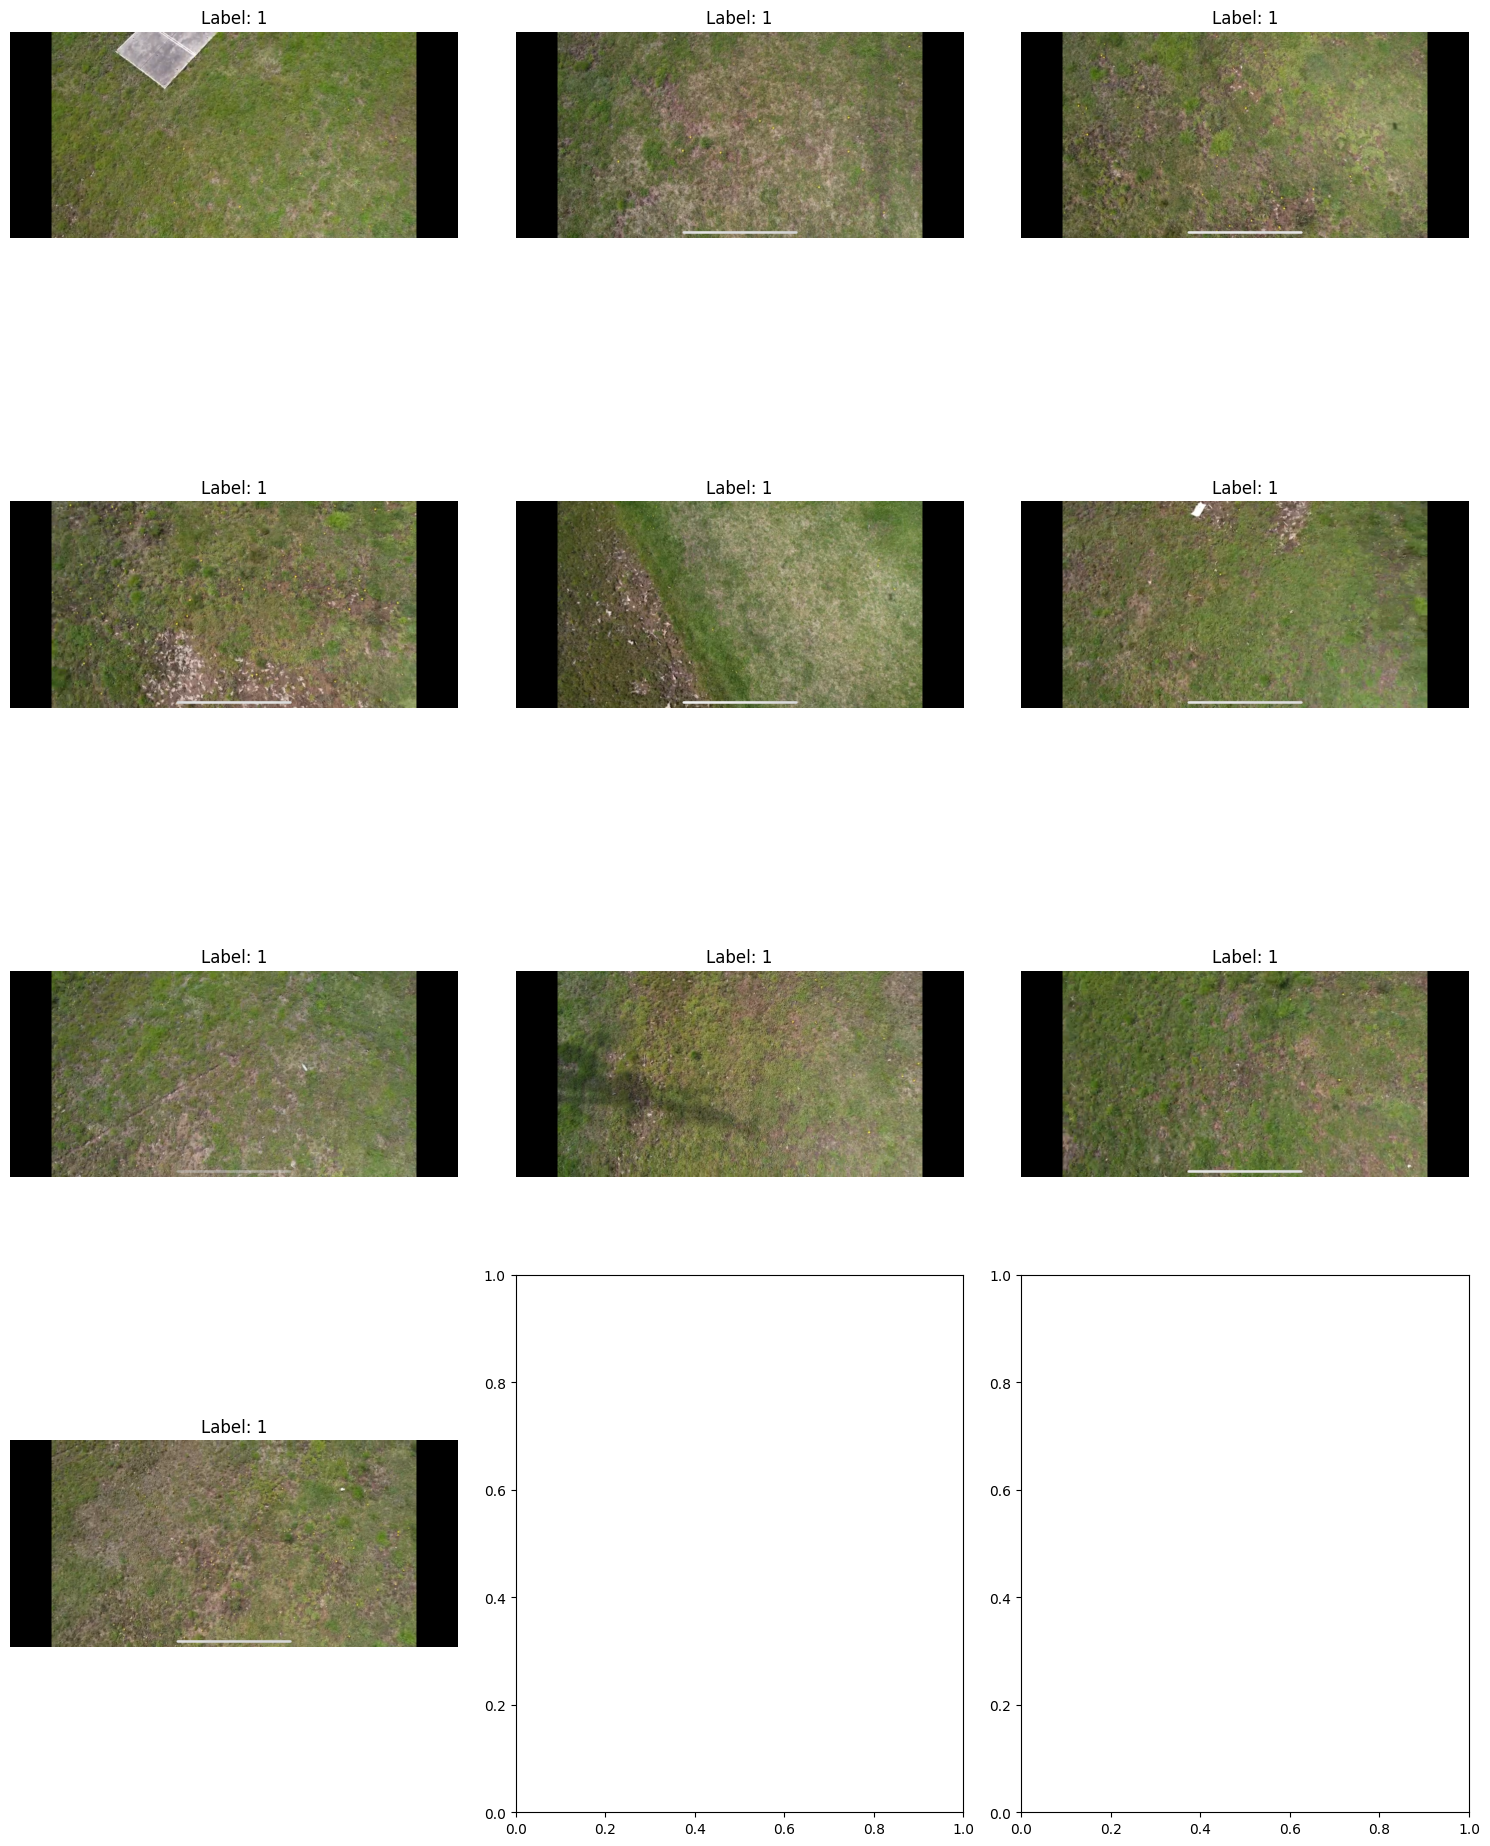

In [63]:
plot_images_with_labels(im, predicted_labels)